<a href="https://colab.research.google.com/github/PyBeginner1/CusomerChurn/blob/main/BusinessChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [42]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [43]:
data.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4429,3486-HOOGQ,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),79.7,5743.3,No
2437,0567-GGCAC,Female,0,No,No,7,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,No,Electronic check,61.4,438.9,No


In [44]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [46]:
data.drop('customerID', axis = 1, inplace = True)

In [47]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
data['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [49]:
data['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [50]:
pd.to_numeric(data['TotalCharges'], errors = 'coerce').isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [51]:
data[pd.to_numeric(data['TotalCharges'], errors = 'coerce').isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [52]:
data.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [53]:
data1 = data[data['TotalCharges'] != ' ']
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [54]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [55]:
pd.to_numeric(data1['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [56]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [57]:
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Loyal Customer

In [59]:
data1[data1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


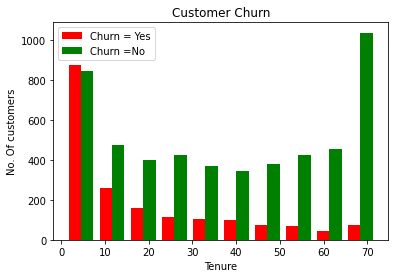

In [60]:
tenure_churn_no = data1[data1.Churn == 'No'].tenure
tenure_churn_yes = data1[data1.Churn == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], label= ['Churn = Yes', 'Churn =No'])
plt.xlabel('Tenure')
plt.ylabel('No. Of customers')
plt.title('Customer Churn')
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


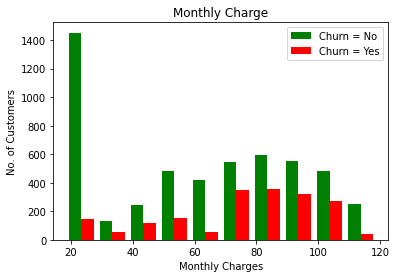

In [61]:
monthlycharge_no = data1[data1.Churn == 'No'].MonthlyCharges
monthlycharge_yes = data1[data1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('No. of Customers')
plt.title('Monthly Charge')
plt.hist([monthlycharge_no, monthlycharge_yes], color = ['green', 'red'], label = ['Churn = No', 'Churn = Yes'])
plt.legend()

In [62]:
data1.replace('No internet service', 'No', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [63]:
data1.replace('No phone service', 'No', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [64]:
for col in data1:
  if data1[col].dtype == 'object':
    print(f'{col} : {data1[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [65]:
yes_no_columns = ['Partner','Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [66]:
for i in yes_no_columns:
  data1[i].replace({'Yes': 0, 'No': 1}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [67]:
#data2

In [68]:
data1['gender'].replace({'Female': 0, 'Male': 1}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [69]:
for col in data1:
  print(f'{col} : {data1[col].unique()}')


gender : [0 1]
SeniorCitizen : [0 1]
Partner : [0 1]
Dependents : [1 0]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [1 0]
MultipleLines : [1 0]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [1 0]
OnlineBackup : [0 1]
DeviceProtection : [1 0]
TechSupport : [1 0]
StreamingTV : [1 0]
StreamingMovies : [1 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [0 1]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [1 0]


In [70]:
def onehot_encoder(data, columns):
  for column in columns:
    dummy = pd.get_dummies(data[column])
    data = pd.concat([data, dummy], axis = 1)
    data.drop(column, axis = 1, inplace = True)
  return data

In [71]:
#data2 = pd.get_dummies(data=data2, columns=['InternetService','Contract','PaymentMethod'])
#data2.columns

In [72]:
columns = ['InternetService','Contract', 'PaymentMethod' ]
data2 = onehot_encoder(data1, columns)

In [73]:
data2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,29.85,29.85,1,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,34,0,1,0,1,0,1,1,1,1,56.95,1889.50,1,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,0,0,1,1,1,1,0,53.85,108.15,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,1,45,1,1,0,1,0,0,1,1,1,42.30,1840.75,1,1,0,0,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,1,1,1,1,1,1,0,70.70,151.65,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,0,0,0,1,0,0,0,0,0,84.80,1990.50,1,1,0,0,0,1,0,0,0,0,1
7039,0,0,0,0,72,0,0,1,0,0,1,0,0,0,103.20,7362.90,1,0,1,0,0,1,0,0,1,0,0
7040,0,0,0,0,11,1,1,0,1,1,1,1,1,0,29.60,346.45,1,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,1,4,0,0,1,1,1,1,1,1,0,74.40,306.60,0,0,1,0,1,0,0,0,0,0,1


#Scaling

In [74]:
data2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,0,1,1,1,1,1,0,1,1,1,1,0,29.85,29.85,1,1,0,0,1,0,0,0,0,1,0
1,1,0,1,1,34,0,1,0,1,0,1,1,1,1,56.95,1889.50,1,1,0,0,0,1,0,0,0,0,1
2,1,0,1,1,2,0,1,0,0,1,1,1,1,0,53.85,108.15,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,1,45,1,1,0,1,0,0,1,1,1,42.30,1840.75,1,1,0,0,0,1,0,1,0,0,0
4,0,0,1,1,2,0,1,1,1,1,1,1,1,0,70.70,151.65,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,0,0,0,1,0,0,0,0,0,84.80,1990.50,1,1,0,0,0,1,0,0,0,0,1
7039,0,0,0,0,72,0,0,1,0,0,1,0,0,0,103.20,7362.90,1,0,1,0,0,1,0,0,1,0,0
7040,0,0,0,0,11,1,1,0,1,1,1,1,1,0,29.60,346.45,1,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,1,4,0,0,1,1,1,1,1,1,0,74.40,306.60,0,0,1,0,1,0,0,0,0,0,1


Train Test split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:

X = data2.drop('Churn', axis = 1)
Y = data2['Churn']

In [77]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])

In [78]:
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [79]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.0,0.0,1.0,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.115423,0.001275,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.464789,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.385075,0.215867,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,1.0,0.014085,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,1.0,0.619718,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.014085,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.521891,0.015330,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,0.0,0.0,0.323944,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.662189,0.227521,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,0.0,0.0,0.0,0.0,0.140845,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.112935,0.037809,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,1.0,1.0,0.0,1.0,0.042254,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.558706,0.033210,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
Y

0       1
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    1
Name: Churn, Length: 7032, dtype: int64

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)

In [82]:
print(X.shape, X_train.shape, X_test.shape)

(7032, 26) (5625, 26) (1407, 26)


In [83]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
                          keras.layers.Dense(15, activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')
])


model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 5)

Epoch 1/5
176/176 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2763
Epoch 2/5
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2672
Epoch 3/5
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2672
Epoch 4/5
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2672
Epoch 5/5
176/176 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2672


In [84]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
3451,0.0,0.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.012438,0.000081,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
611,1.0,0.0,1.0,0.0,0.915493,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.022886,0.154431,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
588,1.0,0.0,0.0,0.0,0.985915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.717910,0.767280,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2680,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.819900,0.844132,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1544,1.0,0.0,1.0,1.0,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.274627,0.003121,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1.0,0.0,1.0,1.0,0.253521,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.468657,0.139978,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5192,0.0,0.0,0.0,0.0,0.971831,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.878109,0.851396,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3980,0.0,0.0,1.0,1.0,0.140845,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.579602,0.094525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1.0,0.0,1.0,1.0,0.014085,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.359701,0.010997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
Y_train

3457    1
612     1
589     1
2685    1
1549    0
       ..
907     1
5200    1
3987    0
235     0
5165    0
Name: Churn, Length: 5625, dtype: int64

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

model.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [87]:
pred = model.predict(X_test)


In [90]:
from sklearn.metrics import accuracy_score

In [93]:
score = accuracy_score(Y_test, pred)
print('Accuracy is: {:.2f}%'.format(score * 100))

Accuracy is: 79.03%
